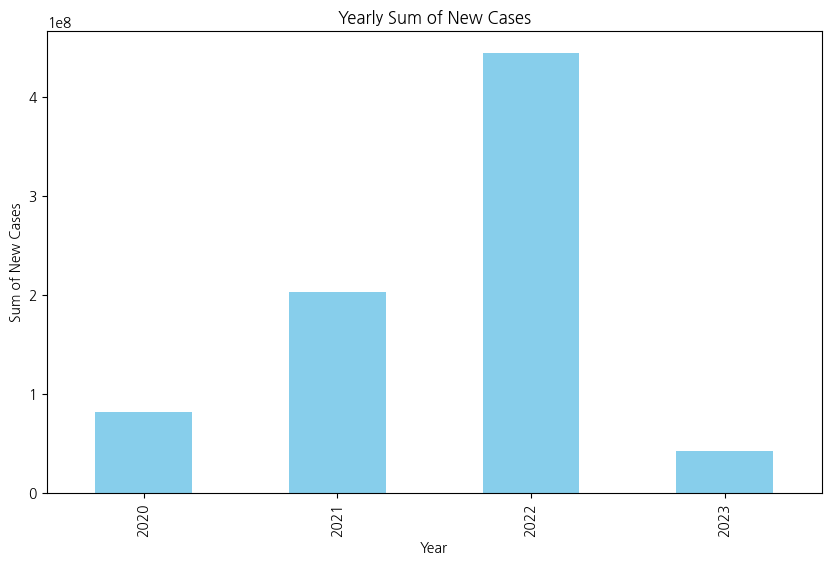

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumGothic'

df=pd.read_csv('COVID19_global_data.csv')
df

df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# 연도별 New_cases 합계 계산
df['Year'] = df['Date_reported'].dt.year
yearly_new_cases = df.groupby('Year')['New_cases'].sum()

# 시각화
plt.figure(figsize=(10, 6))
yearly_new_cases.plot(kind='bar', color='skyblue')
plt.title('Yearly Sum of New Cases')
plt.xlabel('Year')
plt.ylabel('Sum of New Cases')
plt.show()

In [7]:
df = pd.DataFrame(df)

# Date_reported 열을 날짜 형식으로 변환
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# 연도별 New_cases 합계 계산
df['Year'] = df['Date_reported'].dt.year
yearly_new_cases = df.groupby('Year')['New_cases'].sum()

# 결과 DataFrame 출력
result_df = pd.DataFrame({'Year': yearly_new_cases.index, 'Sum_of_New_Cases': yearly_new_cases.values})
print(result_df)

   Year  Sum_of_New_Cases
0  2020          82335574
1  2021         203111242
2  2022         444029532
3  2023          42576404


In [16]:
df=pd.read_csv('COVID19_global_data.csv')


df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# 연도 및 분기 정보 생성
df['Year'] = df['Date_reported'].dt.year
df['Quarter'] = df['Date_reported'].dt.quarter

# 분기별 New_cases 합계 계산
quarterly_new_cases = df.groupby(['Year', 'Quarter'])['New_cases'].sum().reset_index()

# 결과 DataFrame 출력
result_df = pd.DataFrame({'Year': quarterly_new_cases['Year'], '분기': quarterly_new_cases['Quarter'], '신규 확진자 수 총합': quarterly_new_cases['New_cases']})
print(result_df)

    Year  분기  신규 확진자 수 총합
0   2020   1       782774
1   2020   2      9377665
2   2020   3     23887893
3   2020   4     48287242
4   2021   1     45249877
5   2021   2     53867815
6   2021   3     51708489
7   2021   4     52285061
8   2022   1    199602207
9   2022   2     58715437
10  2022   3     69811344
11  2022   4    115900544
12  2023   1     31684149
13  2023   2      6260493
14  2023   3      3485382
15  2023   4      1146380


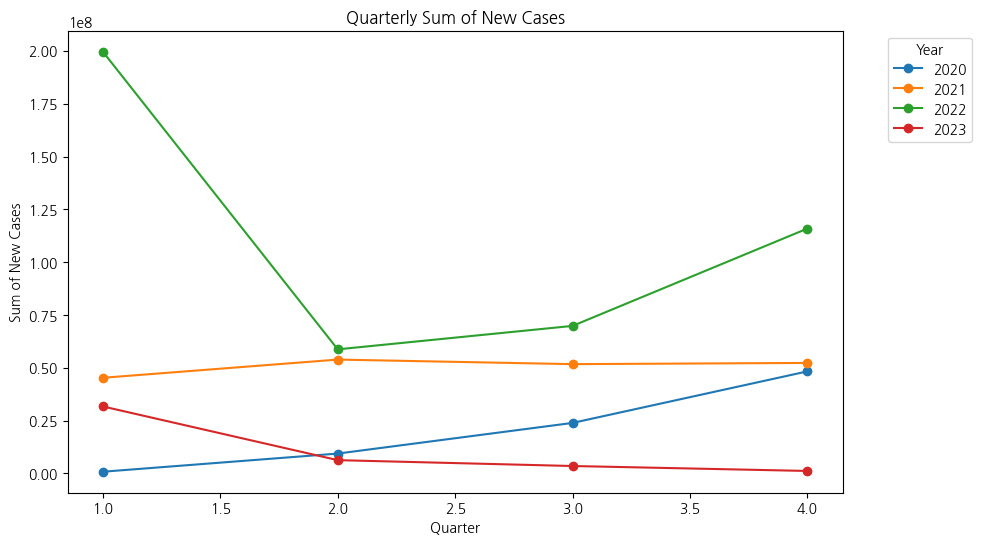

In [17]:
plt.figure(figsize=(10, 6))
for year in quarterly_new_cases['Year'].unique():
    year_data = quarterly_new_cases[quarterly_new_cases['Year'] == year]
    plt.plot(year_data['Quarter'], year_data['New_cases'], label=str(year), marker='o')

plt.title('Quarterly Sum of New Cases')
plt.xlabel('Quarter')
plt.ylabel('Sum of New Cases')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
# quarterly_new_cases['Year_Quarter'] = quarterly_new_cases['Year'].astype(str) + 'Q' + quarterly_new_cases['Quarter'].astype(str)

# # 시각화
# plt.figure(figsize=(10, 6))
# plt.plot(quarterly_new_cases['Year_Quarter'], quarterly_new_cases['New_cases'], marker='o')

# plt.title('Quarterly Sum of New Cases')
# plt.xlabel('Year and Quarter')
# plt.ylabel('Sum of New Cases')
# plt.xticks(rotation=45)
# plt.show()

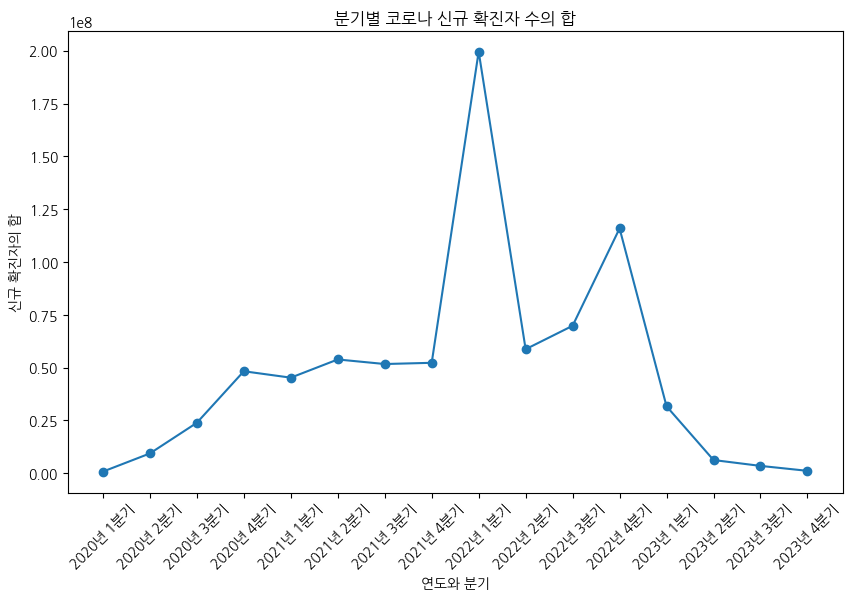

In [21]:
quarterly_new_cases['Year_Quarter'] = quarterly_new_cases['Year'] + '년 ' + quarterly_new_cases['Quarter'] + '분기'
plt.figure(figsize=(10, 6))
plt.plot(quarterly_new_cases['Year_Quarter'], quarterly_new_cases['New_cases'], marker='o')

plt.title('분기별 코로나 신규 확진자 수의 합')
plt.xlabel('연도와 분기')
plt.ylabel('신규 확진자의 합')

# X 축 레이블 포맷팅
plt.xticks(rotation=45)

plt.show()